In [1]:
%pylab inline
import glob
import numpy as np
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# PLot validation of each optimal allele in a period together

def main():
    print('Running main')
    means = [10**-5, 10**-4, 10**-3, 10**-2] #, 10**-4, 10**-3, 10**-2] 
    pers = [2,3,4]
    opt_dic = {}
    opt_dic[2] = [11,14,17,20]# 11,14,17,
    opt_dic[3] = [5,6,7,8] #,6,7,8
    opt_dic[4] = [7,8,9,10]
    color_list = ['C0','C1','C2','C3']
    folder = 't29'
    fig_num = 0
    
    for per in pers:
        color_num = -1
        fig_num = fig_num + 1
        
        for opt in opt_dic[per]:
            color_num = color_num + 1
            list_of_s = []
            errors = []
            legend_labels = []

            for mean in means:
                
                for j in range(0,3):

                    file_list = glob.glob('./results/validation_multiple_one_opt/%s/per_%d_opt_%d_*_%.5f.txt'%(folder, per, opt, mean)) 
                    file_list.sort()
                       
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    line = lines[6]       
                    info = line.strip().split(': ')
                    params = info[1]
                    params = params.strip().split('), ')
                    #print(params)
                    params_list = []
                    for param in params:
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        #print(param)
                        params_list.append(((float(param[1])), float(param[2])))
                    #print(params_list)
                    
                    
                    line = lines[1]
                    info = line.strip().split(' ')
                    
                    k = float(info[7])
                    theta = float(info[10])
                    legend_labels.append('(%.1E,%.1E)'%(k,theta))
                    print((per, opt, mean))
                    print((k,theta))
                    
                    svals_0 = []
                    svals_1 = []
                    svals_2 = []
                    svals_3 = []
                    for param in params_list:
                        svals = GetGammaBins(param[0], param[1])
                        svals_0.append(svals[0])
                        svals_1.append(svals[1])
                        svals_2.append(svals[2])
                        svals_3.append(svals[3])
                    svals = [svals_0, svals_1, svals_2, svals_3]
            
                    fig = plt.figure(fig_num)
                    # Creating axes instance 
                    ax = fig.add_axes([0, 0, 1, 1]) 
                    label_names = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
                    # Creating plot 
                    bp = ax.boxplot(svals, labels=label_names) 
                    svals =  GetGammaBins(k, theta)
                    ax.plot( 1, svals[0], marker='*',markersize=20, c = 'deeppink' ) 
                    ax.plot( 2, svals[1], marker='*', markersize=20, c = 'deeppink'  ) 
                    ax.plot( 3, svals[2], marker='*', markersize=20, c = 'deeppink' ) 
                    ax.plot( 4, svals[3], marker='*', markersize=20, c = 'deeppink'  ) 
                    ax.set_ylabel('Fraction of loci')
                    ax.set_title('Period %d Optimal allele %d \n Ground truth gamma distrubution mean %.5f a %.5f b %.5f'%(per, opt, mean, k, theta))
                    # show plot 
                    plt.show() 
                    '''
                    svals =  GetGammaBins(k, theta)
                    fig_num = fig_num + 1
                    plt.figure(fig_num)
                    x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
                    y_pos = np.arange(len(x))
                    barWidth = 0.2
                    r1 = np.arange(len(x))

                    plt.bar(r1, svals, color='red', width=barWidth) 
                    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
                    plt.xticks(rotation=15) 
                    plt.xlabel("S value")
                    plt.ylabel("Probability")
                    plt.title("Gamma Distribution k=%.5f; theta=%.5f"%(k, theta)) 
                    '''
            '''
            y_pos = np.arange(len(legend_labels))

            plt.errorbar(y_pos[0:3], list_of_s[0:3], marker = 'o', ls = '--', c=color_list[color_num], label = '%d'%(opt)) 
            plt.errorbar(y_pos[3:6], list_of_s[3:6],  marker = 'o', ls = '--' , c=color_list[color_num]) 
            plt.errorbar(y_pos[6:9], list_of_s[6:9],  marker = 'o', ls = '--' , c=color_list[color_num]) 
            plt.errorbar(y_pos[9:12], list_of_s[9:12],  marker = 'o', ls = '--', c=color_list[color_num]) 
            plt.xticks(y_pos[0:12], legend_labels[0:12], rotation = 35) 
        plt.yscale('log')
        plt.ylabel("Estimated s")
        plt.axvline(x=2.5, linestyle = '--')
        plt.axvline(x=5.5, linestyle = '--')
        plt.axvline(x=8.5, linestyle = '--')
        plt.text(0.7,10**-7.3,r'$s=10^{-5}$')
        plt.text(3.7,10**-7.3,r'$s=10^{-4}$')
        plt.text(6.7,10**-7.3,r'$s=10^{-3}$')
        plt.text(9.7,10**-7.3,r'$s=10^{-2}$')
        plt.ylim(10**-6, 10**-1)
        plt.title('Joint method validation: Period %d\nMean of 20 median estimates'%(per))
        plt.legend()
        plt.savefig(PLOTDIR + '%s/per_%d.pdf'%(folder, per),bbox_inches='tight')
        plt.show()
        '''

Running main
(2, 11, 1e-05)
(0.2, 5e-05)


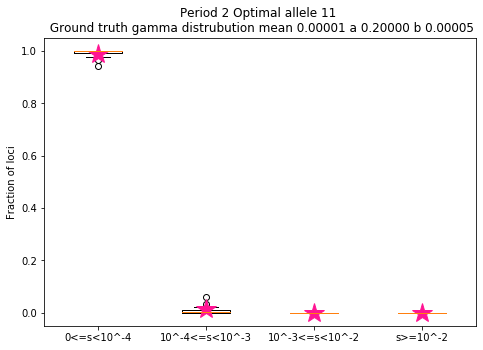

(2, 11, 1e-05)
(0.3, 3.3e-05)


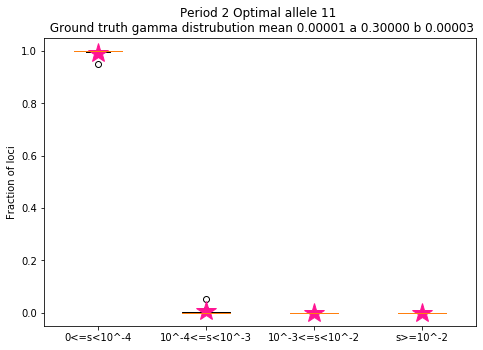

(2, 11, 1e-05)
(0.6, 1.7e-05)


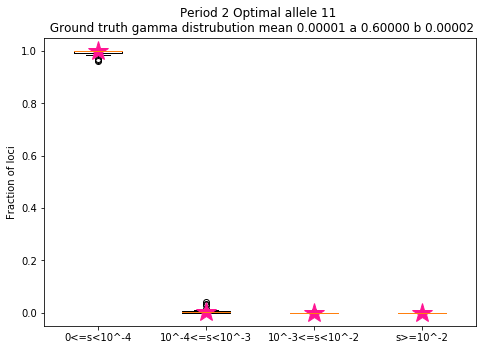

(2, 11, 0.0001)
(0.2, 0.0005)


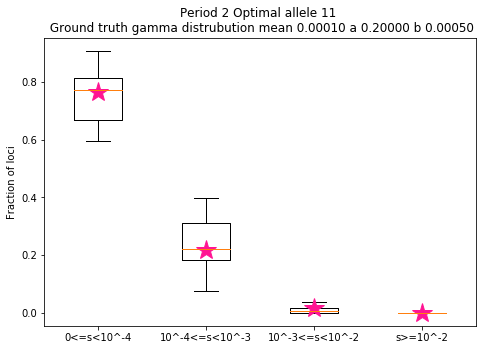

(2, 11, 0.0001)
(0.3, 0.000333)


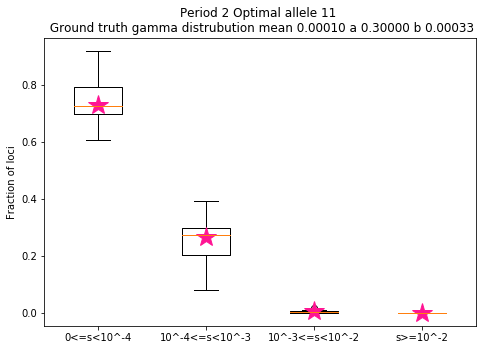

(2, 11, 0.0001)
(0.6, 0.000167)


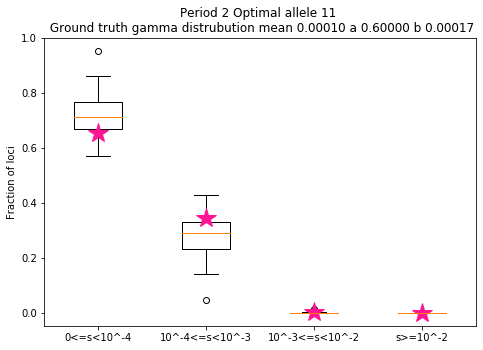

(2, 11, 0.001)
(0.2, 0.005)


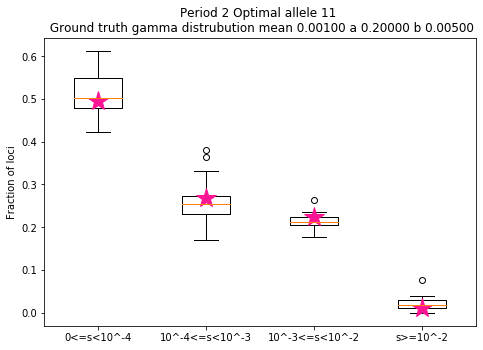

(2, 11, 0.001)
(0.3, 0.003333)


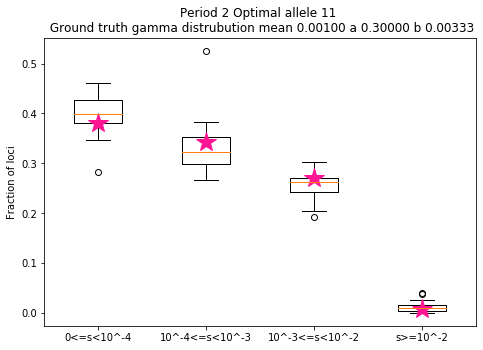

(2, 11, 0.001)
(0.6, 0.001667)


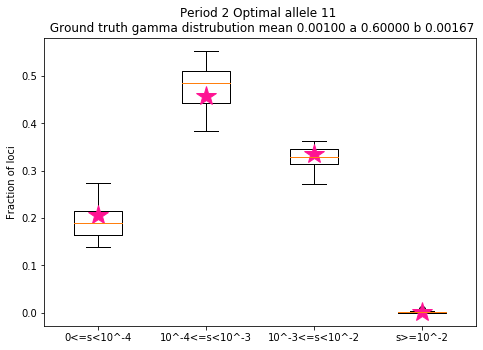

(2, 11, 0.01)
(0.2, 0.05)


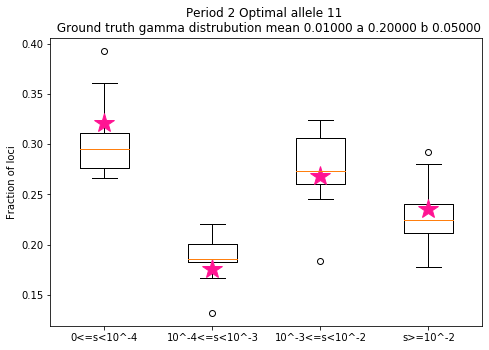

(2, 11, 0.01)
(0.3, 0.033333)


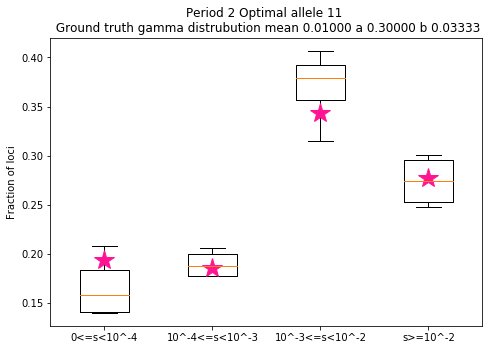

(2, 11, 0.01)
(0.6, 0.016667)


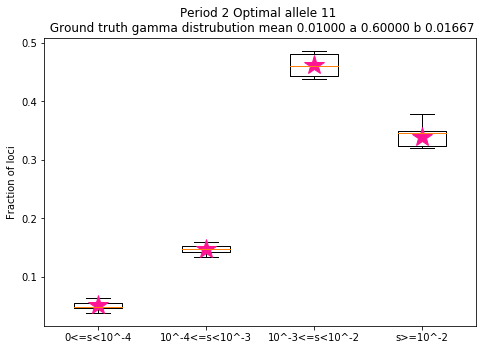

(2, 14, 1e-05)
(0.2, 5e-05)


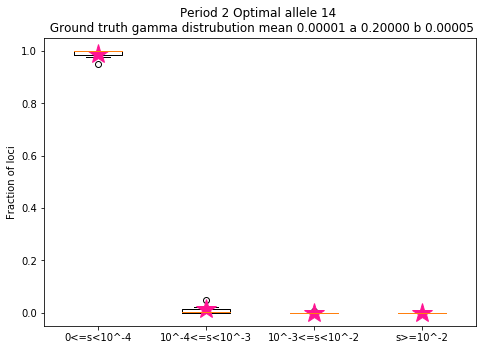

(2, 14, 1e-05)
(0.3, 3.3e-05)


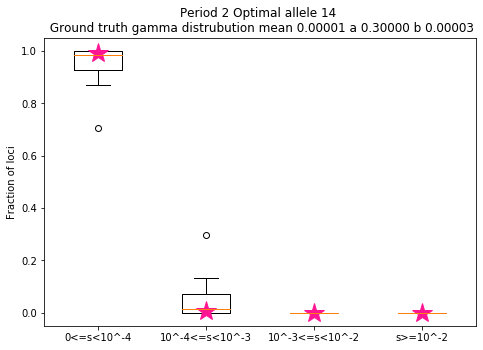

(2, 14, 1e-05)
(0.6, 1.7e-05)


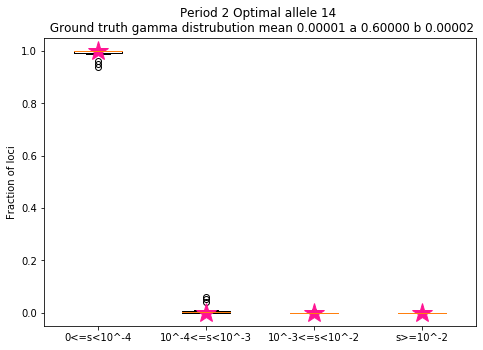

(2, 14, 0.0001)
(0.2, 0.0005)


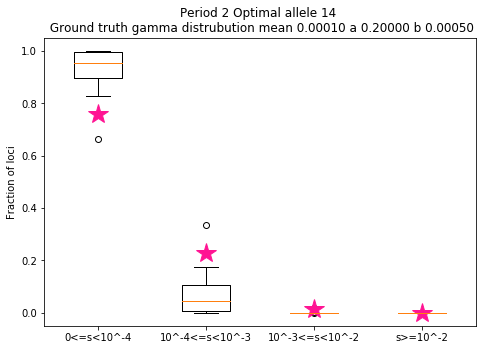

(2, 14, 0.0001)
(0.3, 0.000333)


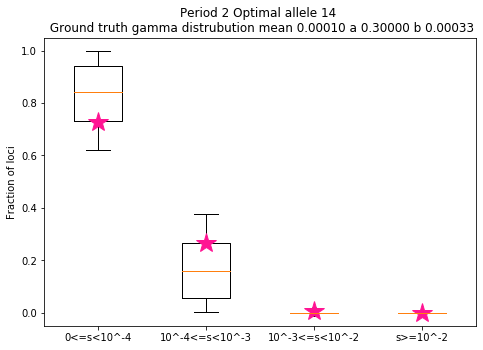

(2, 14, 0.0001)
(0.6, 0.000167)


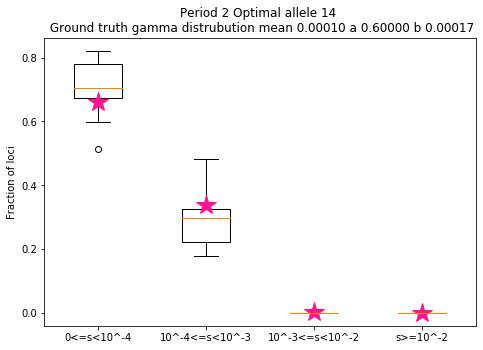

(2, 14, 0.001)
(0.2, 0.005)


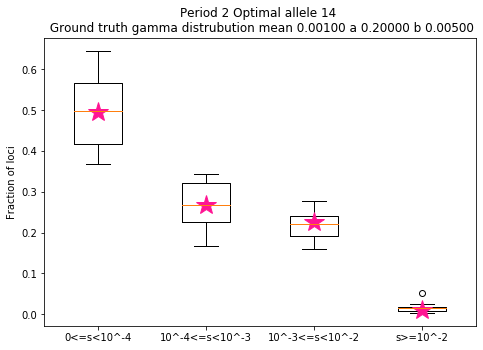

(2, 14, 0.001)
(0.3, 0.003333)


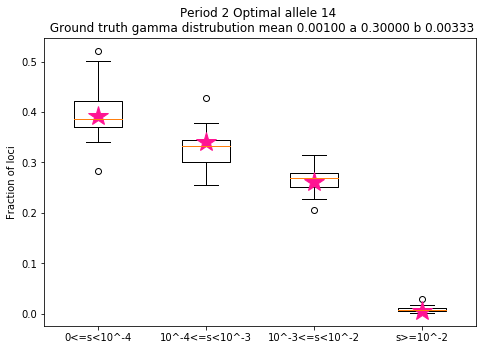

(2, 14, 0.001)
(0.6, 0.001667)


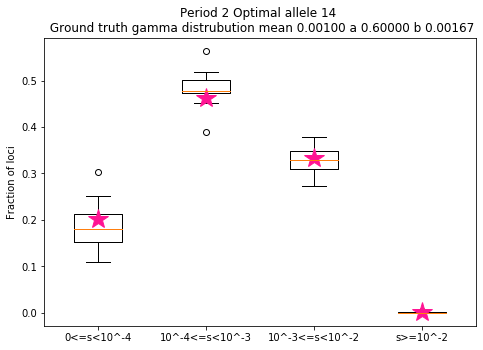

(2, 14, 0.01)
(0.2, 0.05)


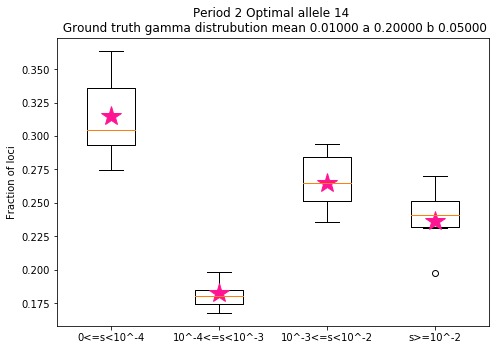

(2, 14, 0.01)
(0.3, 0.033333)


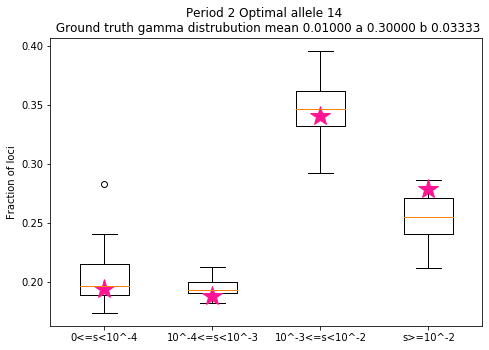

(2, 14, 0.01)
(0.6, 0.016667)


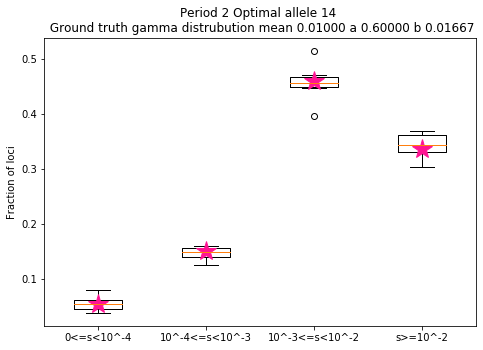

(2, 17, 1e-05)
(0.2, 5e-05)


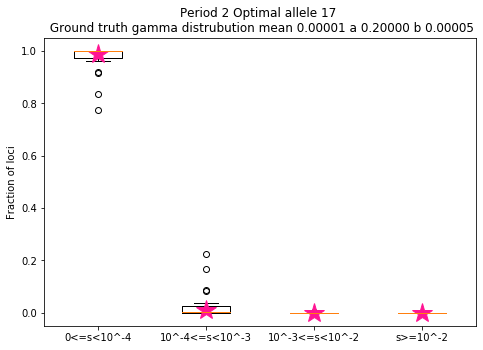

(2, 17, 1e-05)
(0.3, 3.3e-05)


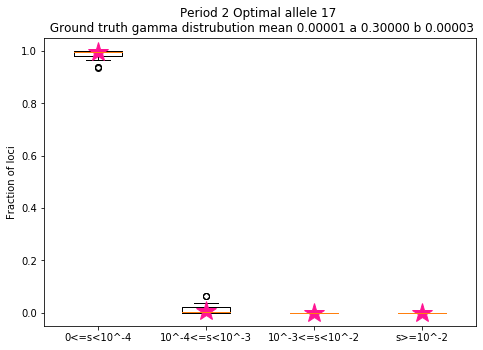

(2, 17, 1e-05)
(0.6, 1.7e-05)


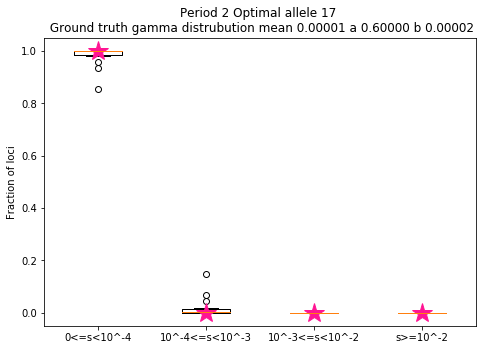

(2, 17, 0.0001)
(0.2, 0.0005)


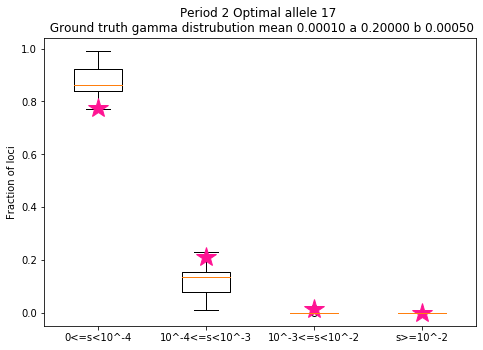

(2, 17, 0.0001)
(0.3, 0.000333)


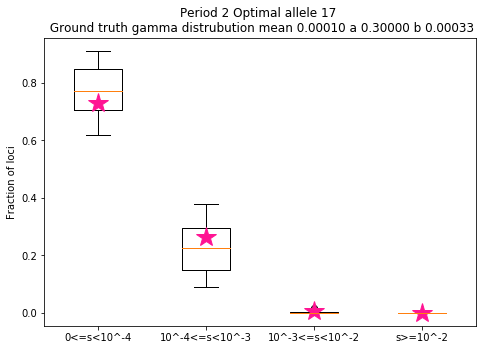

(2, 17, 0.0001)
(0.6, 0.000167)


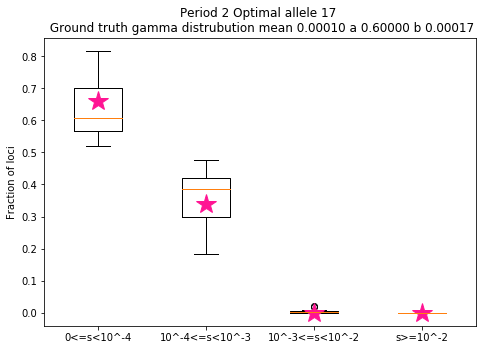

(2, 17, 0.001)
(0.2, 0.005)


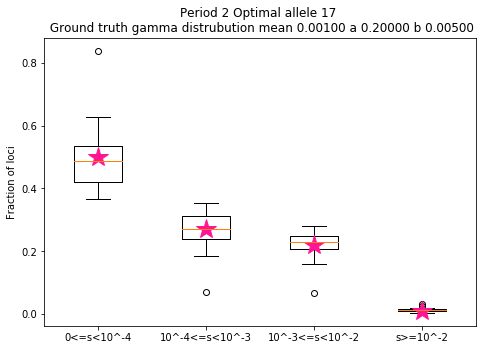

(2, 17, 0.001)
(0.3, 0.003333)


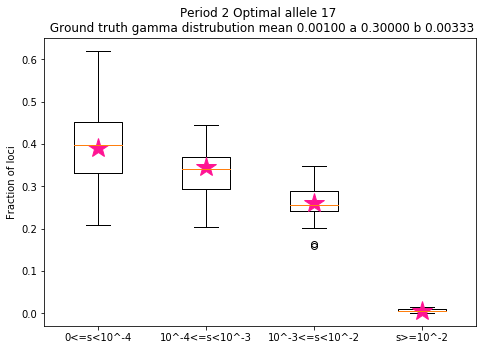

(2, 17, 0.001)
(0.6, 0.001667)


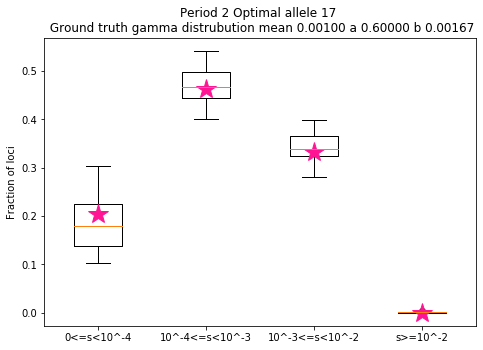

(2, 17, 0.01)
(0.2, 0.05)


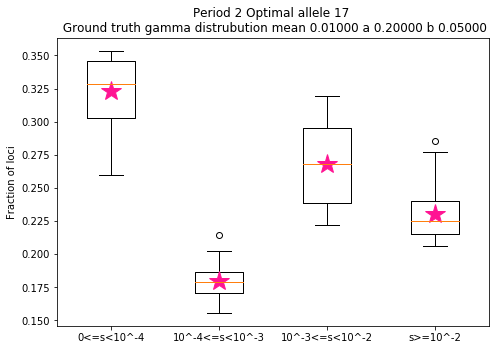

(2, 17, 0.01)
(0.3, 0.033333)


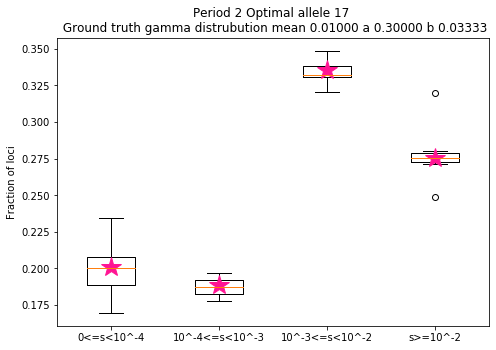

(2, 17, 0.01)
(0.6, 0.016667)


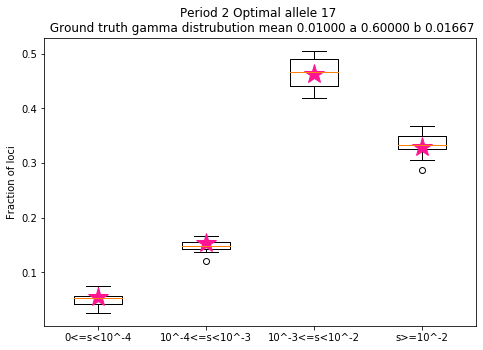

(2, 20, 1e-05)
(0.2, 5e-05)


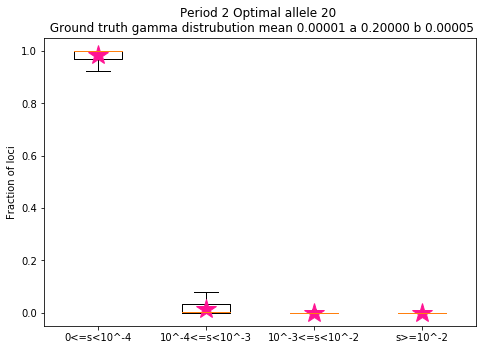

(2, 20, 1e-05)
(0.3, 3.3e-05)


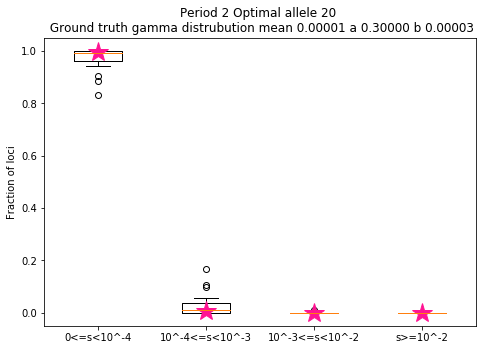

(2, 20, 1e-05)
(0.6, 1.7e-05)


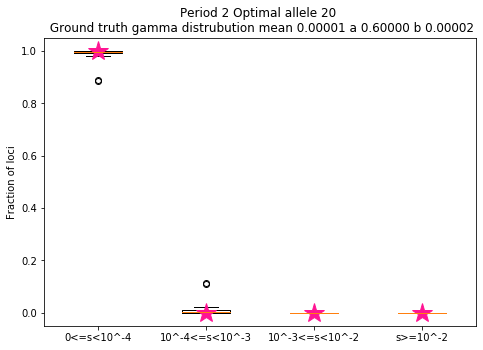

(2, 20, 0.0001)
(0.2, 0.0005)


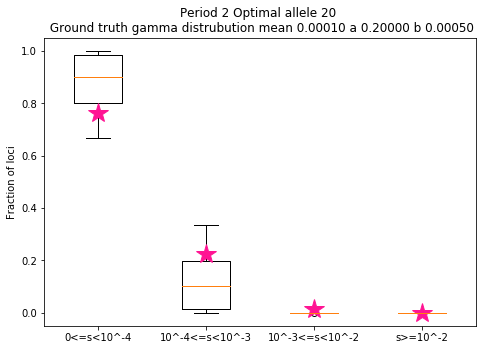

(2, 20, 0.0001)
(0.3, 0.000333)


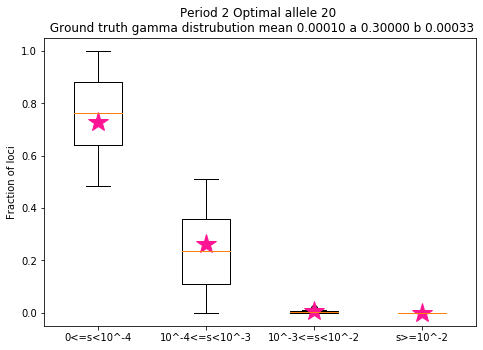

(2, 20, 0.0001)
(0.6, 0.000167)


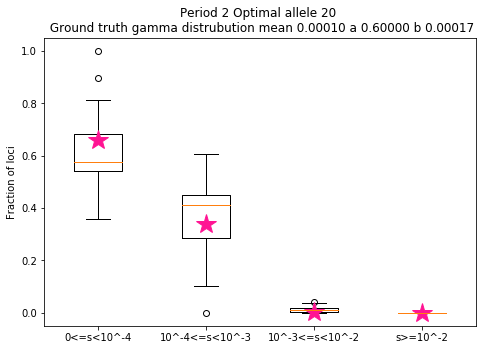

(2, 20, 0.001)
(0.2, 0.005)


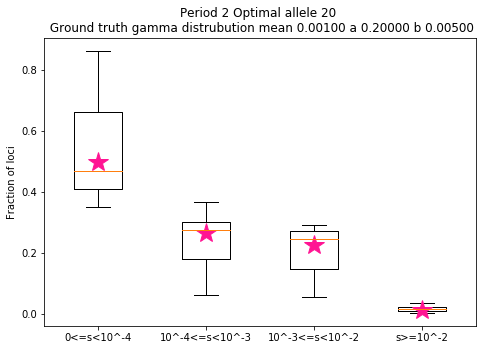

(2, 20, 0.001)
(0.3, 0.003333)


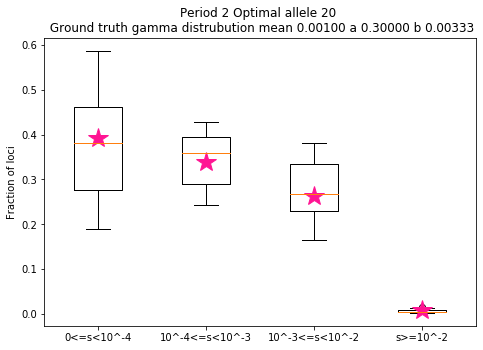

(2, 20, 0.001)
(0.6, 0.001667)


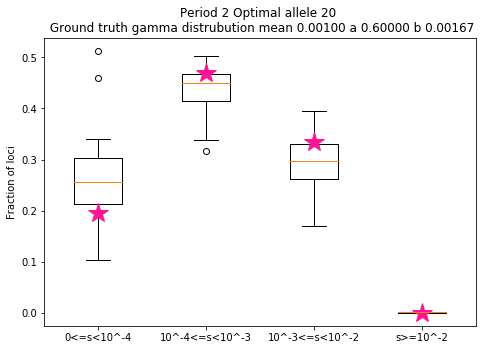

(2, 20, 0.01)
(0.2, 0.05)


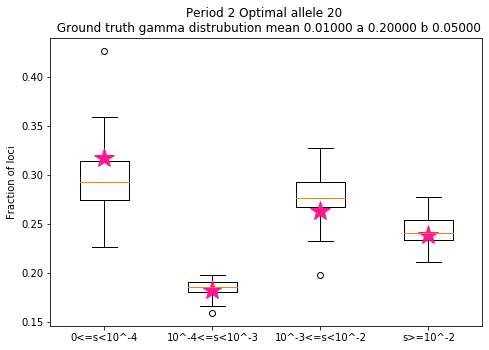

(2, 20, 0.01)
(0.3, 0.033333)


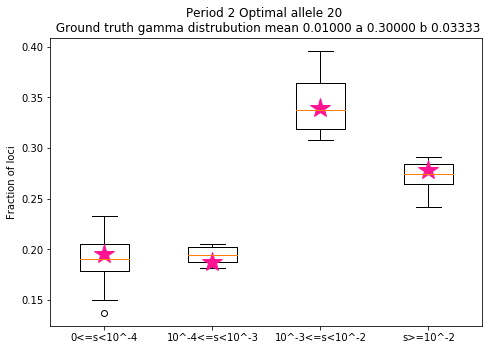

(2, 20, 0.01)
(0.6, 0.016667)


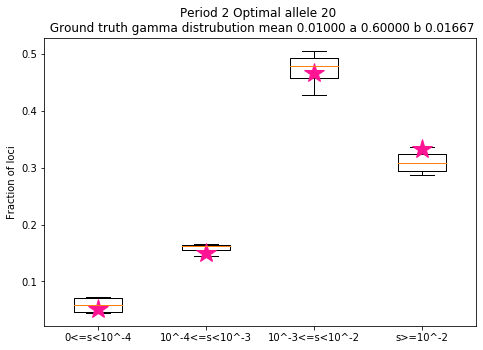

(3, 5, 1e-05)
(0.2, 5e-05)


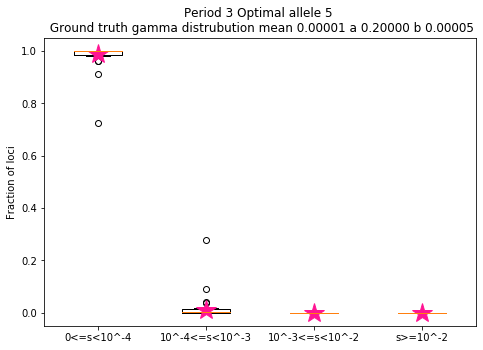

(3, 5, 1e-05)
(0.3, 3.3e-05)


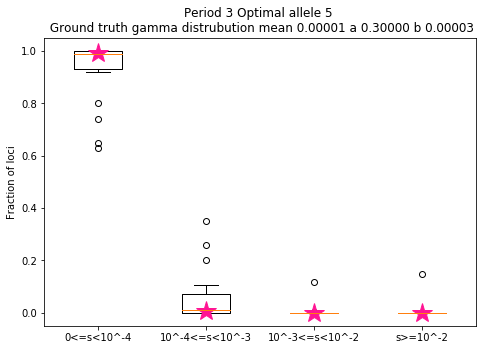

(3, 5, 1e-05)
(0.6, 1.7e-05)


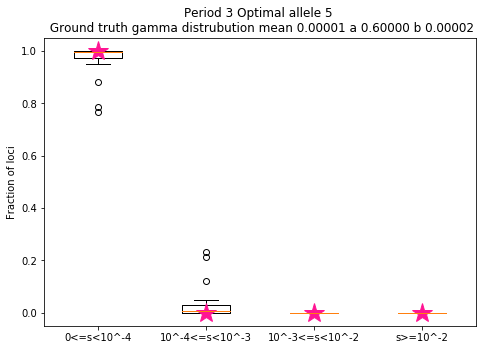

(3, 5, 0.0001)
(0.2, 0.0005)


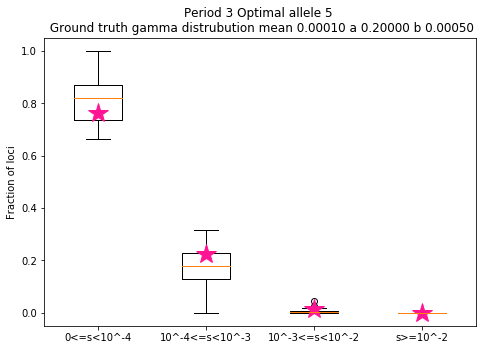

(3, 5, 0.0001)
(0.3, 0.000333)


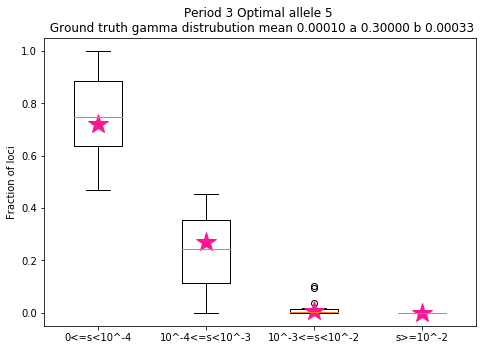

(3, 5, 0.0001)
(0.6, 0.000167)


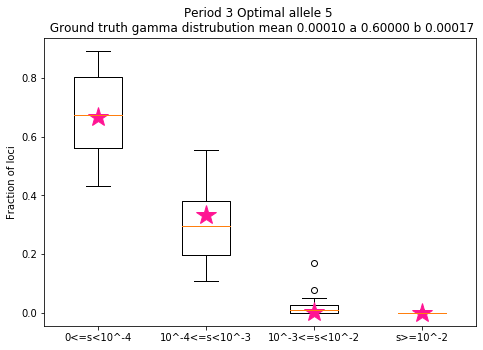

(3, 5, 0.001)
(0.2, 0.005)


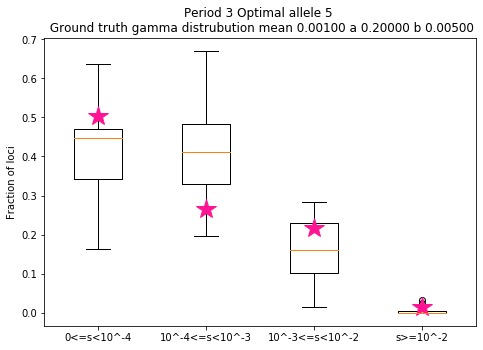

(3, 5, 0.001)
(0.3, 0.003333)


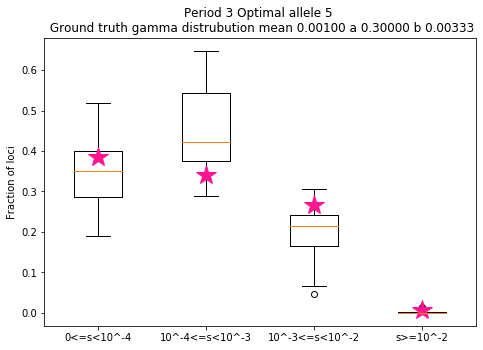

(3, 5, 0.001)
(0.6, 0.001667)


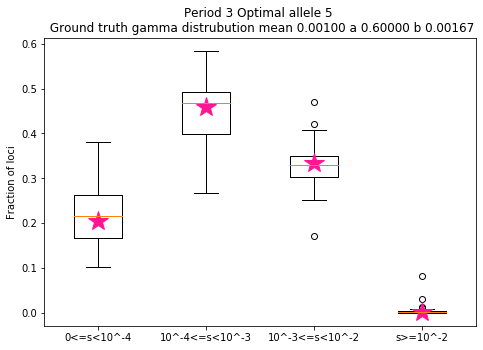

(3, 5, 0.01)
(0.2, 0.05)


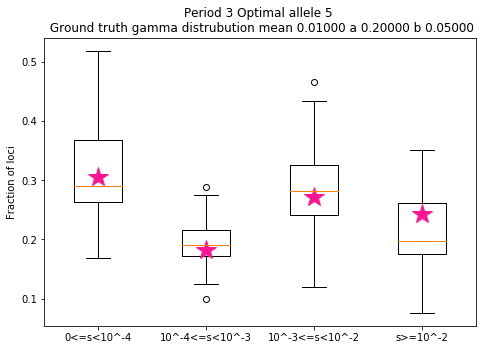

(3, 5, 0.01)
(0.3, 0.033333)


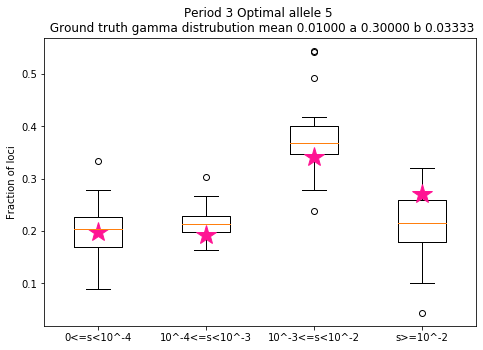

(3, 5, 0.01)
(0.6, 0.016667)


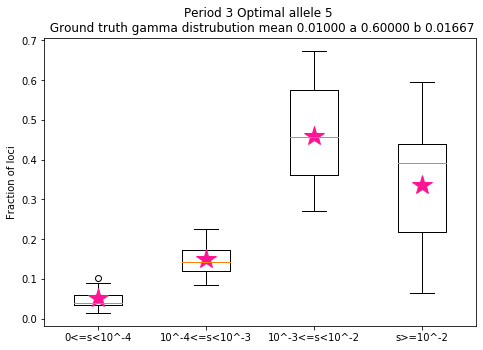

(3, 6, 1e-05)
(0.2, 5e-05)


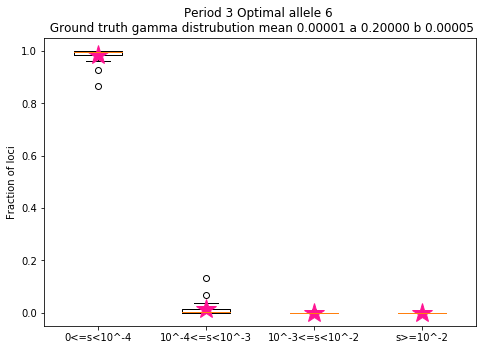

(3, 6, 1e-05)
(0.3, 3.3e-05)


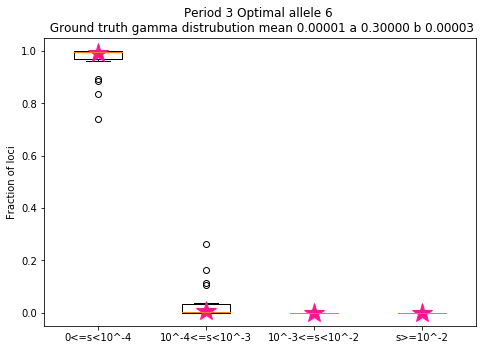

(3, 6, 1e-05)
(0.6, 1.7e-05)


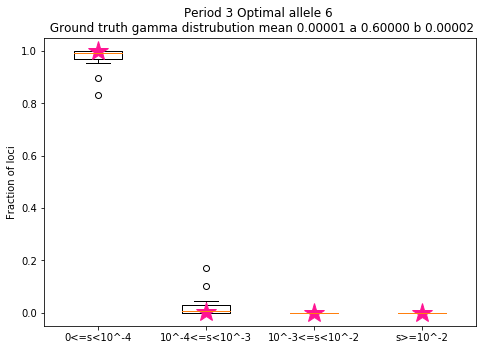

(3, 6, 0.0001)
(0.2, 0.0005)


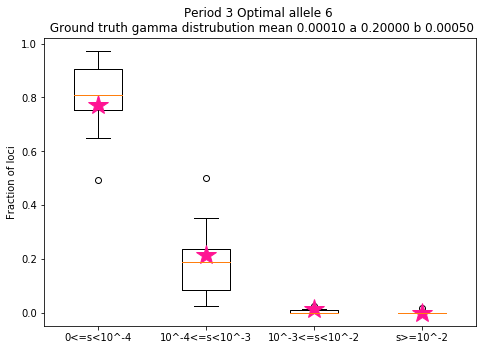

(3, 6, 0.0001)
(0.3, 0.000333)


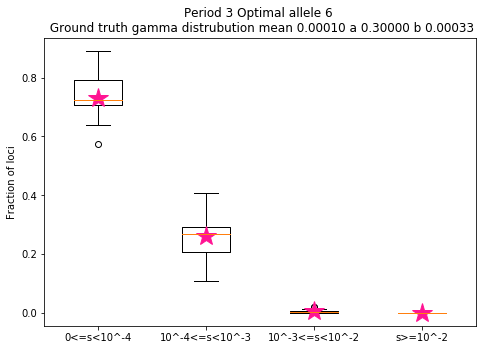

(3, 6, 0.0001)
(0.6, 0.000167)


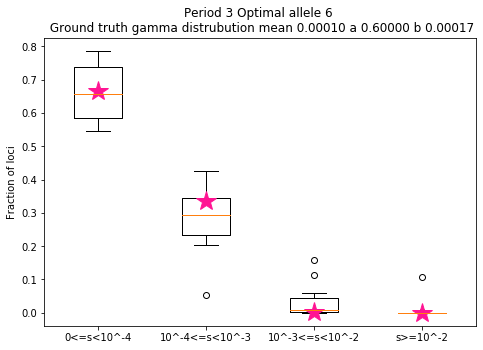

(3, 6, 0.001)
(0.2, 0.005)


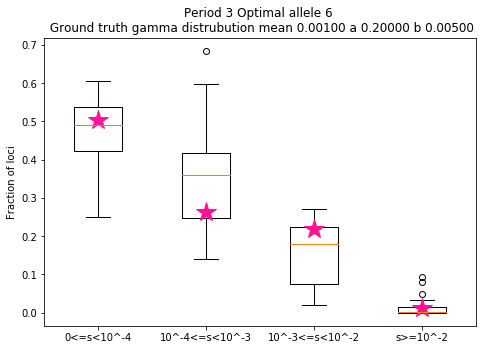

(3, 6, 0.001)
(0.3, 0.003333)


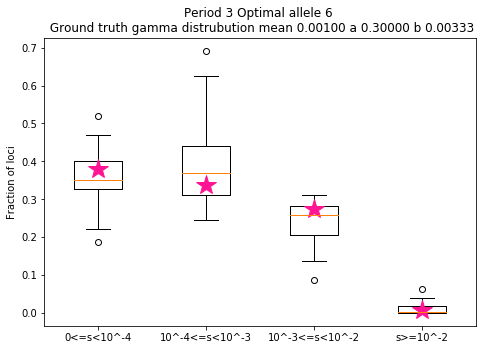

(3, 6, 0.001)
(0.6, 0.001667)


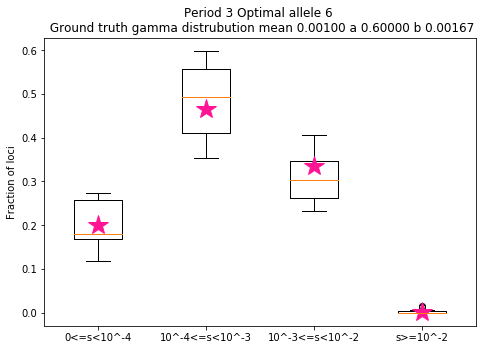

(3, 6, 0.01)
(0.2, 0.05)


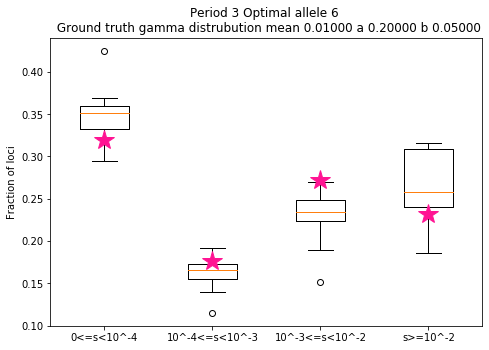

(3, 6, 0.01)
(0.3, 0.033333)


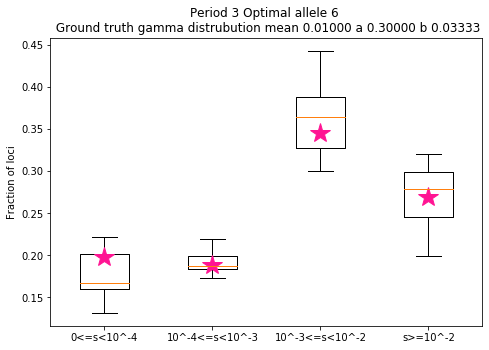

(3, 6, 0.01)
(0.6, 0.016667)


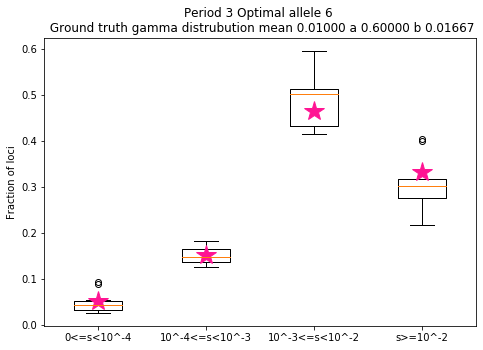

(3, 7, 1e-05)
(0.2, 5e-05)


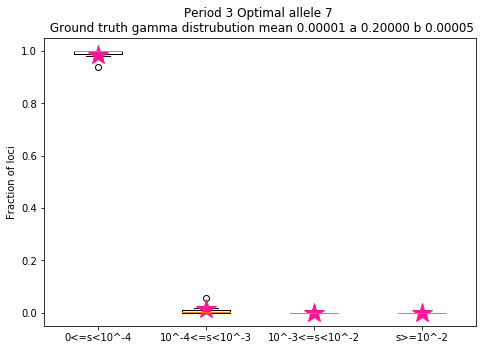

(3, 7, 1e-05)
(0.3, 3.3e-05)


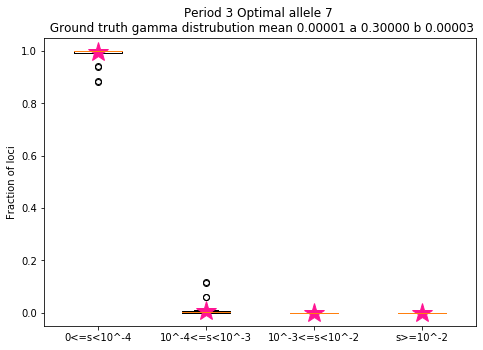

(3, 7, 1e-05)
(0.6, 1.7e-05)


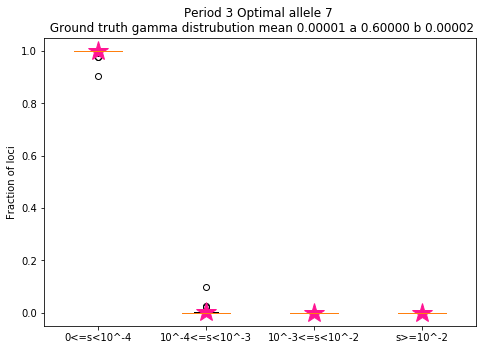

(3, 7, 0.0001)
(0.2, 0.0005)


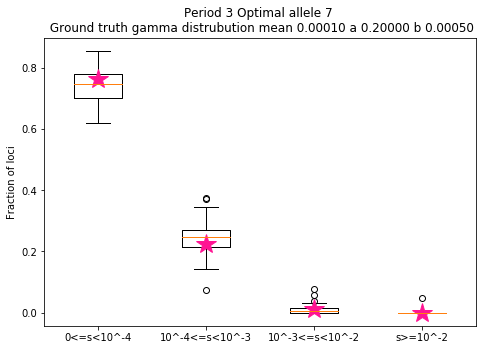

(3, 7, 0.0001)
(0.3, 0.000333)


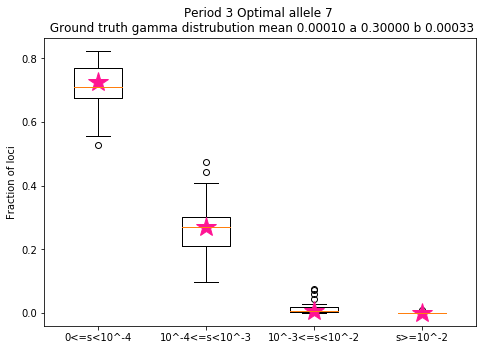

(3, 7, 0.0001)
(0.6, 0.000167)


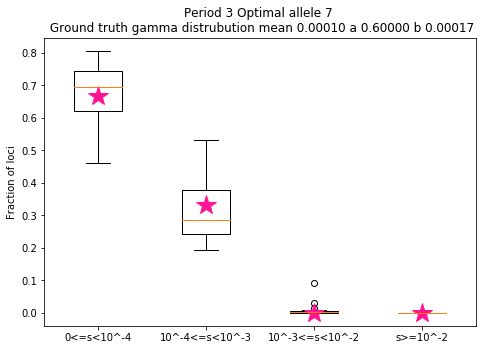

(3, 7, 0.001)
(0.2, 0.005)


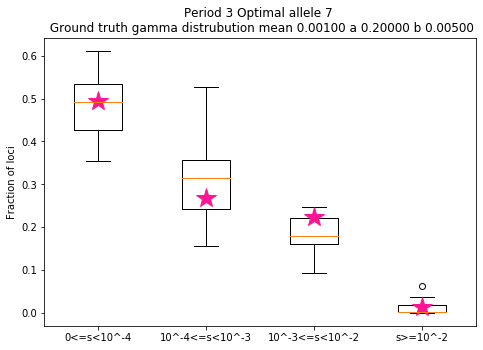

(3, 7, 0.001)
(0.3, 0.003333)


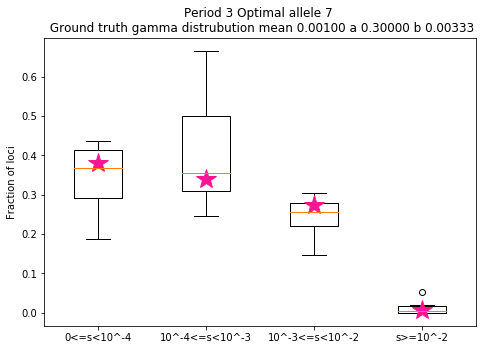

(3, 7, 0.001)
(0.6, 0.001667)


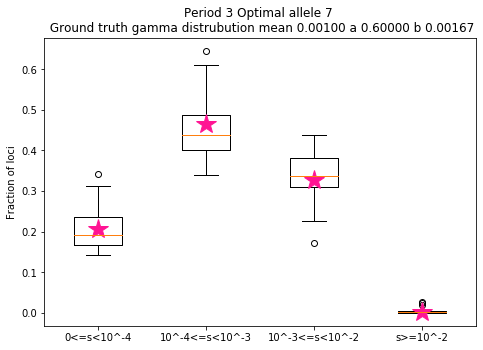

(3, 7, 0.01)
(0.2, 0.05)


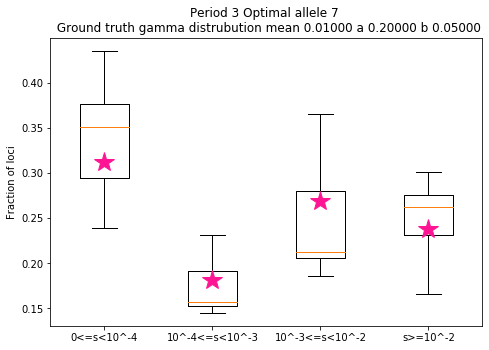

(3, 7, 0.01)
(0.3, 0.033333)


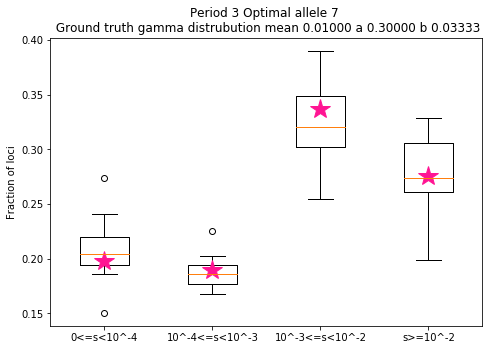

(3, 7, 0.01)
(0.6, 0.016667)


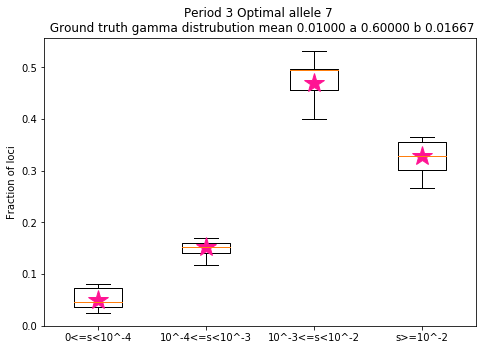

(3, 8, 1e-05)
(0.2, 5e-05)


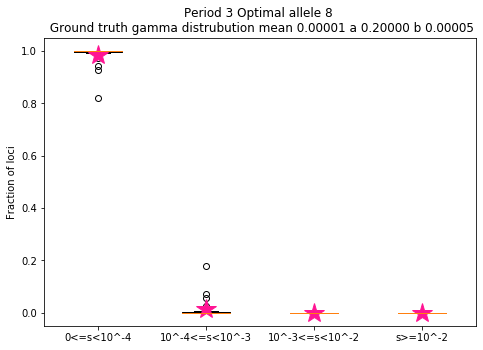

(3, 8, 1e-05)
(0.3, 3.3e-05)


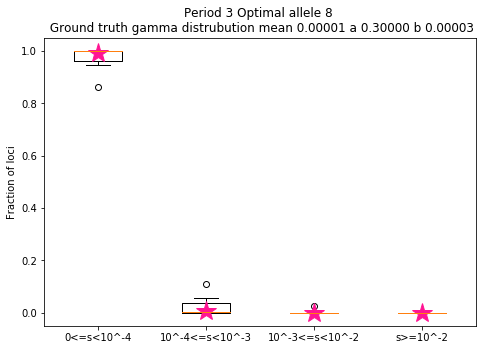

(3, 8, 1e-05)
(0.6, 1.7e-05)


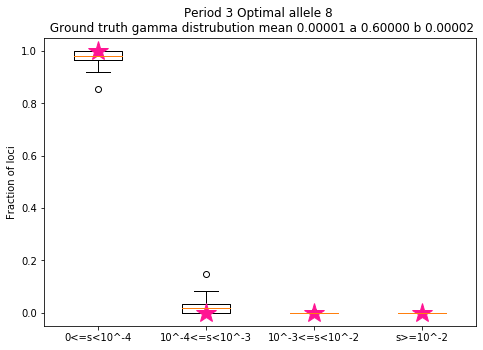

(3, 8, 0.0001)
(0.2, 0.0005)


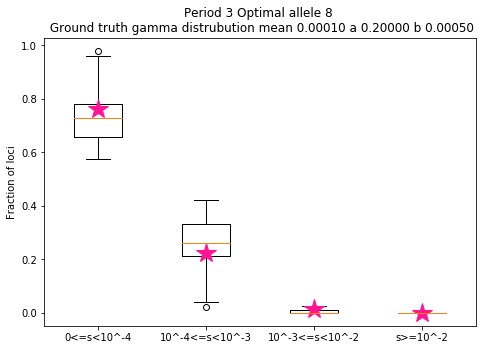

(3, 8, 0.0001)
(0.3, 0.000333)


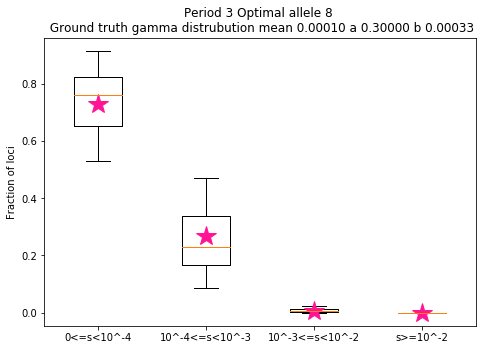

(3, 8, 0.0001)
(0.6, 0.000167)


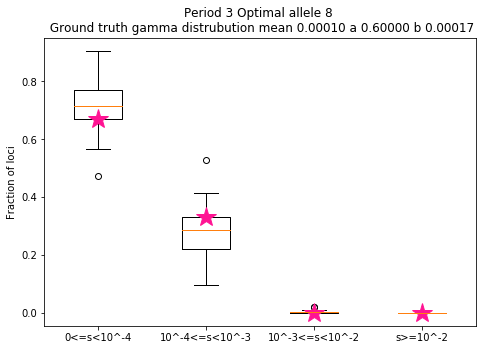

(3, 8, 0.001)
(0.2, 0.005)


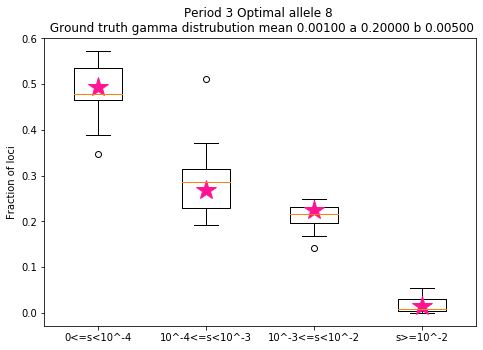

(3, 8, 0.001)
(0.3, 0.003333)


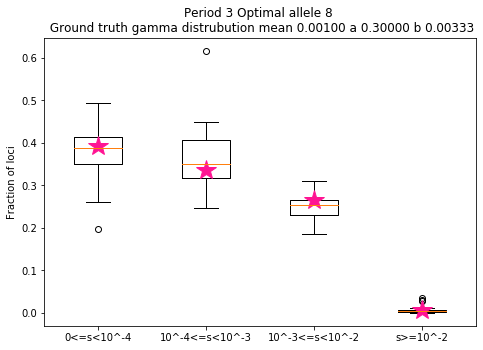

(3, 8, 0.001)
(0.6, 0.001667)


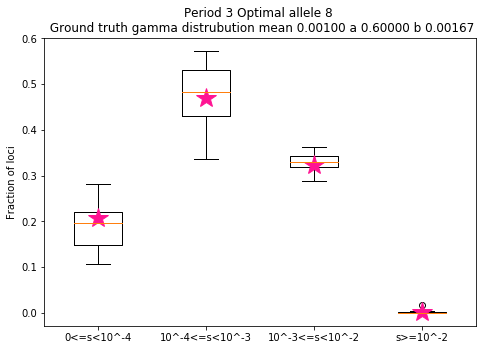

(3, 8, 0.01)
(0.2, 0.05)


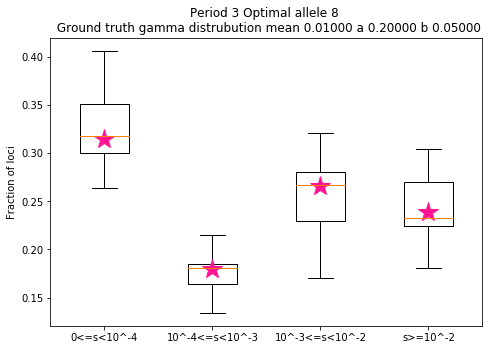

(3, 8, 0.01)
(0.3, 0.033333)


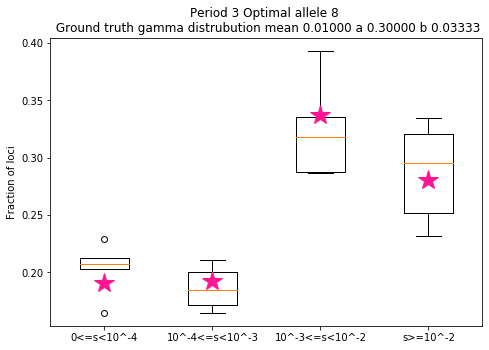

(3, 8, 0.01)
(0.6, 0.016667)


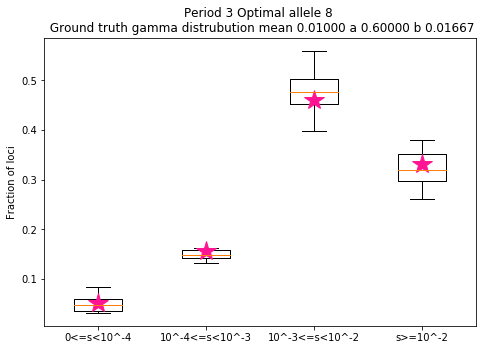

(4, 7, 1e-05)
(0.2, 5e-05)


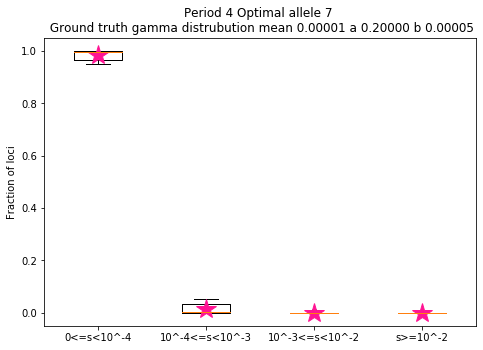

(4, 7, 1e-05)
(0.3, 3.3e-05)


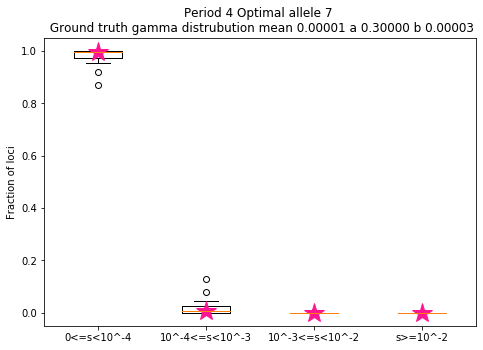

(4, 7, 1e-05)
(0.6, 1.7e-05)


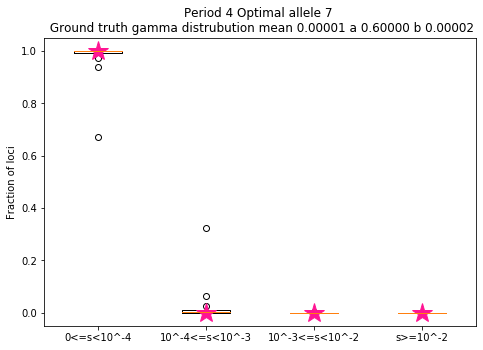

(4, 7, 0.0001)
(0.2, 0.0005)


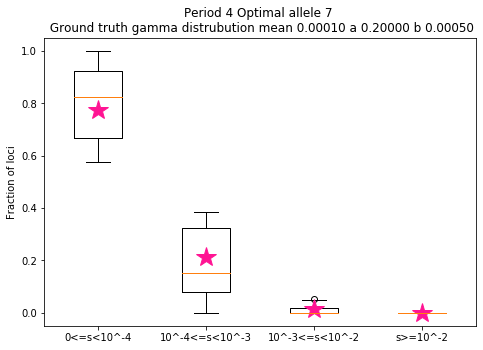

(4, 7, 0.0001)
(0.3, 0.000333)


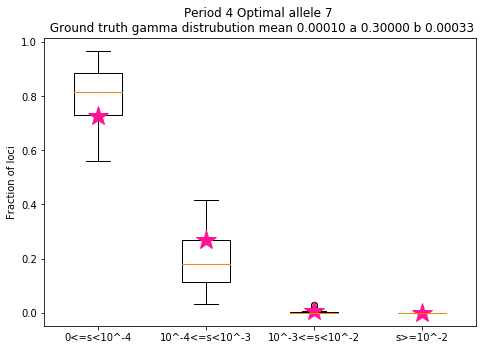

(4, 7, 0.0001)
(0.6, 0.000167)


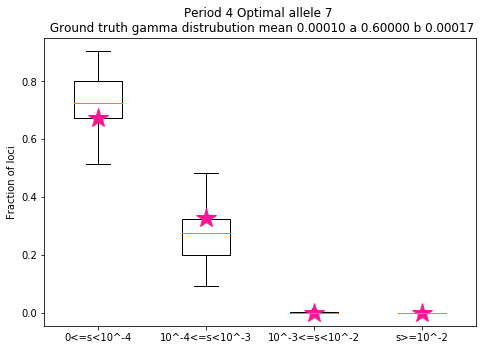

(4, 7, 0.001)
(0.2, 0.005)


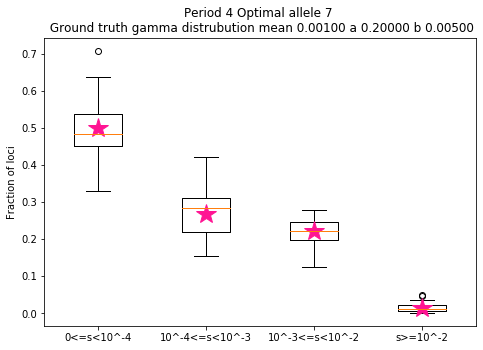

(4, 7, 0.001)
(0.3, 0.003333)


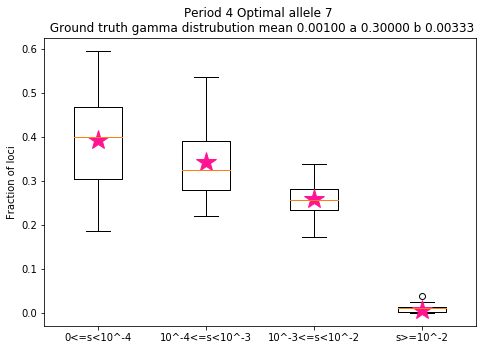

(4, 7, 0.001)
(0.6, 0.001667)


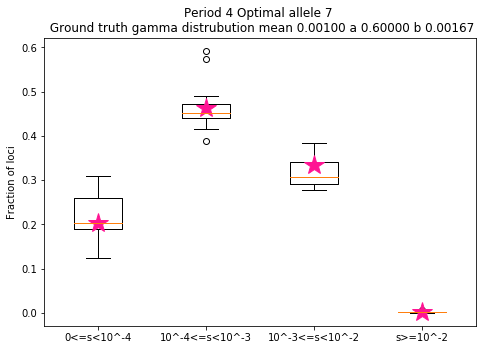

(4, 7, 0.01)
(0.2, 0.05)


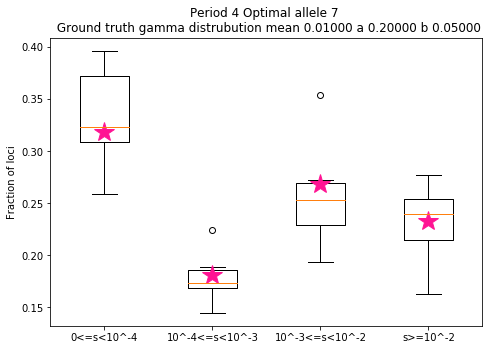

(4, 7, 0.01)
(0.3, 0.033333)


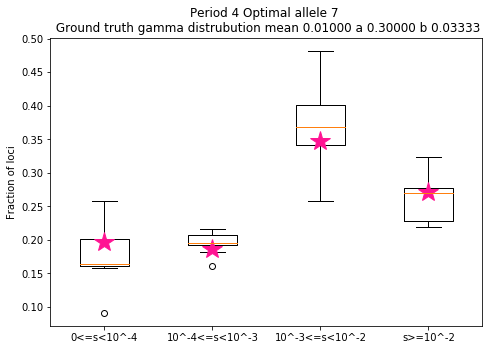

(4, 7, 0.01)
(0.6, 0.016667)


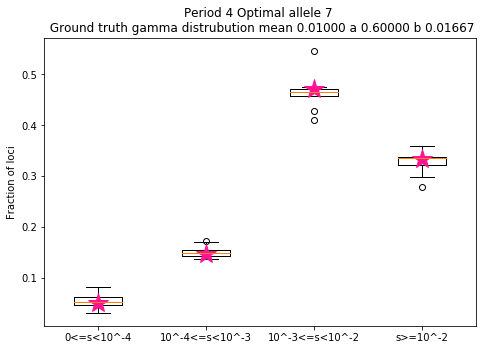

(4, 8, 1e-05)
(0.2, 5e-05)


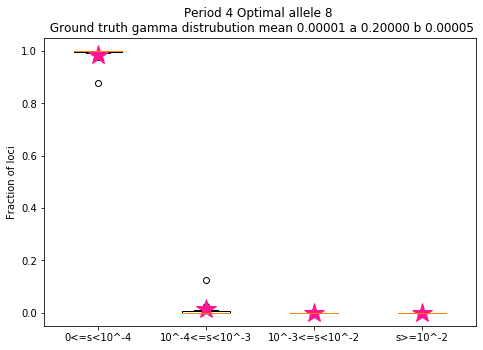

(4, 8, 1e-05)
(0.3, 3.3e-05)


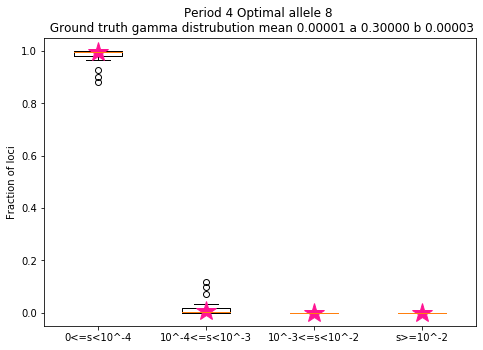

(4, 8, 1e-05)
(0.6, 1.7e-05)


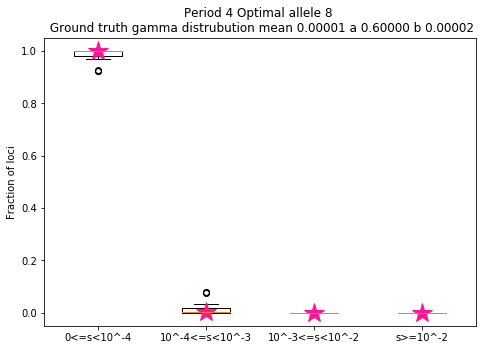

(4, 8, 0.0001)
(0.2, 0.0005)


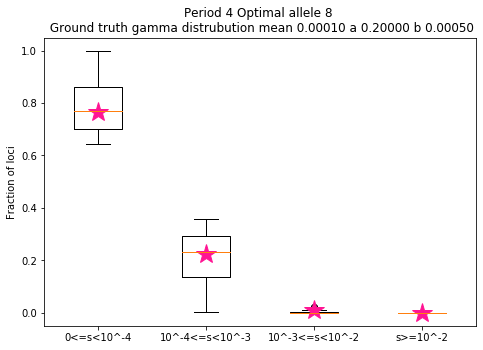

(4, 8, 0.0001)
(0.3, 0.000333)


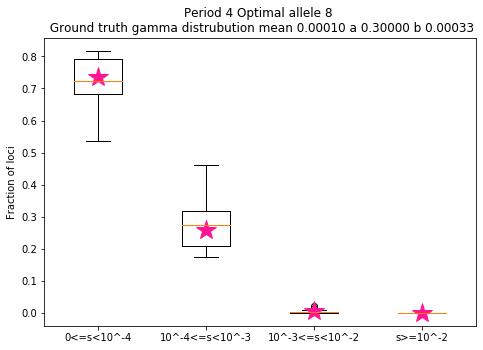

(4, 8, 0.0001)
(0.6, 0.000167)


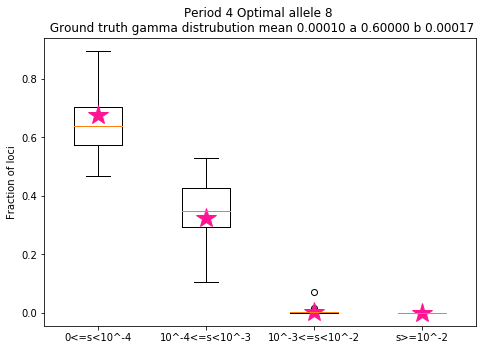

(4, 8, 0.001)
(0.2, 0.005)


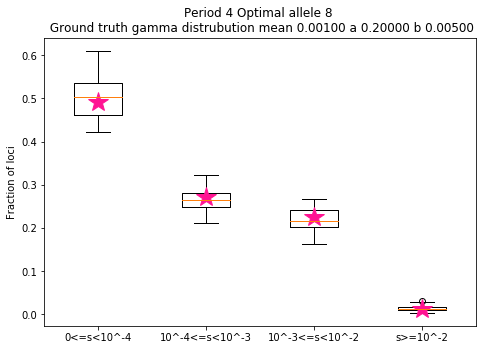

(4, 8, 0.001)
(0.3, 0.003333)


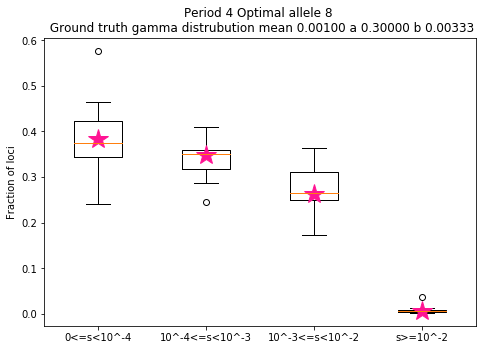

(4, 8, 0.001)
(0.6, 0.001667)


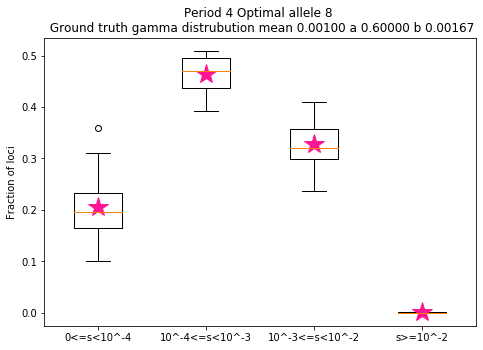

(4, 8, 0.01)
(0.2, 0.05)


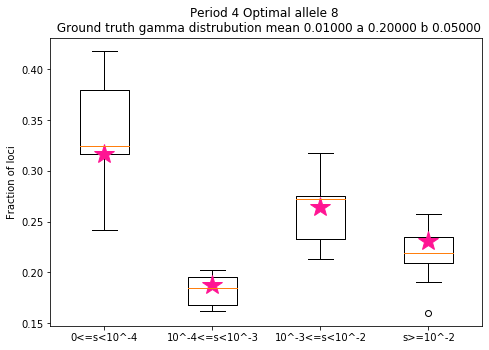

(4, 8, 0.01)
(0.3, 0.033333)


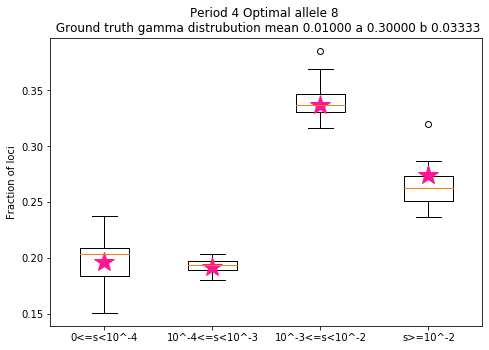

(4, 8, 0.01)
(0.6, 0.016667)


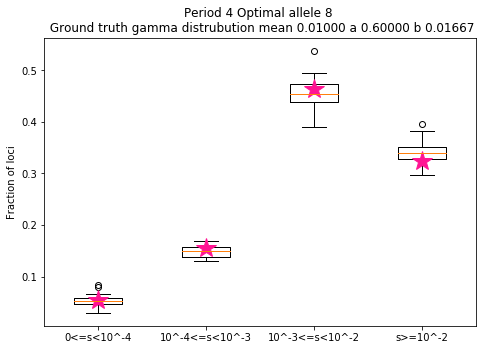

(4, 9, 1e-05)
(0.2, 5e-05)


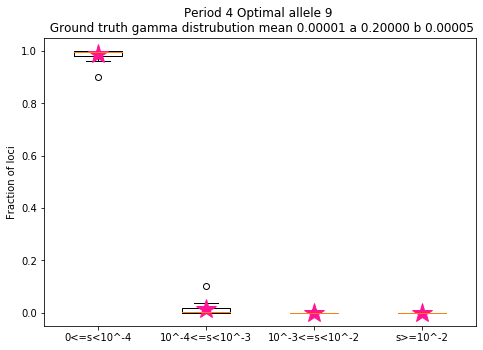

(4, 9, 1e-05)
(0.3, 3.3e-05)


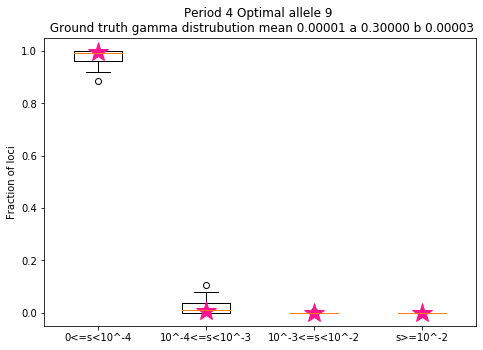

(4, 9, 1e-05)
(0.6, 1.7e-05)


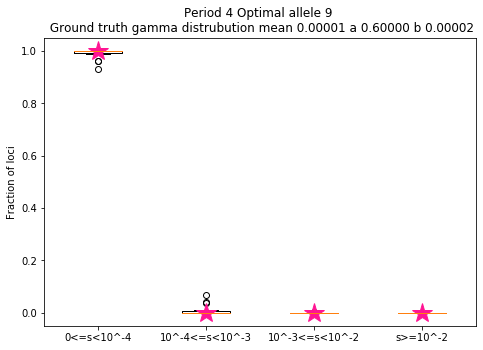

(4, 9, 0.0001)
(0.2, 0.0005)


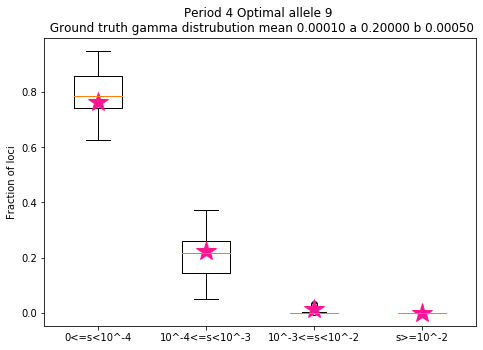

(4, 9, 0.0001)
(0.3, 0.000333)


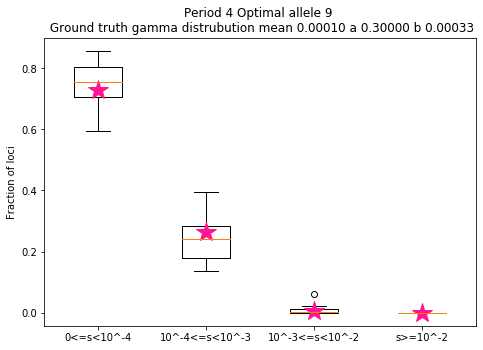

(4, 9, 0.0001)
(0.6, 0.000167)


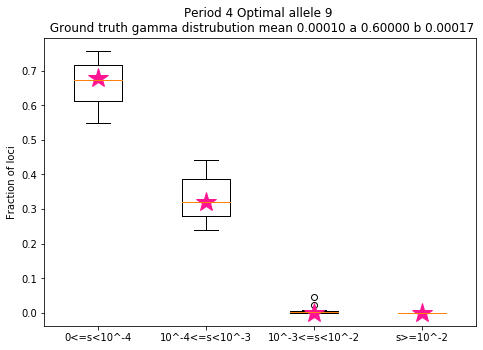

(4, 9, 0.001)
(0.2, 0.005)


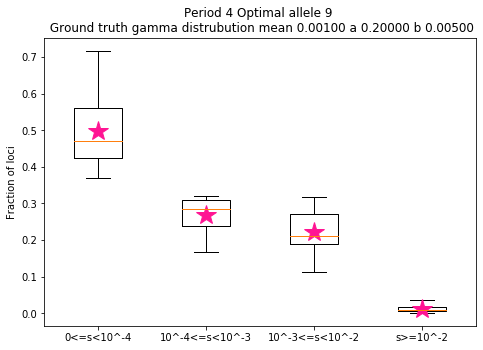

(4, 9, 0.001)
(0.3, 0.003333)


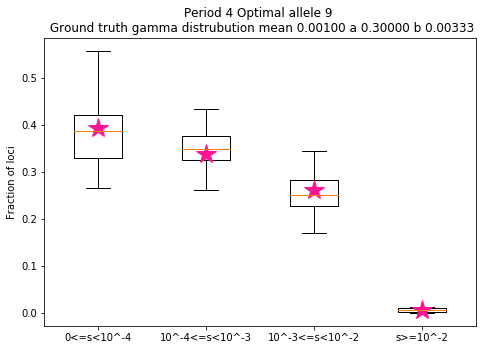

(4, 9, 0.001)
(0.6, 0.001667)


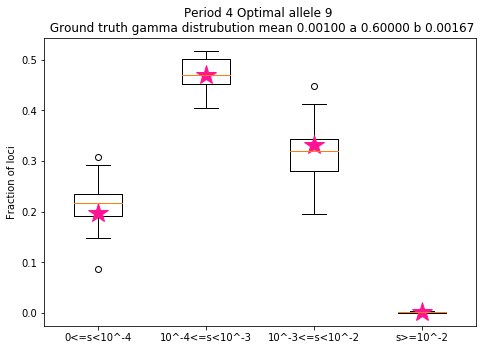

(4, 9, 0.01)
(0.2, 0.05)


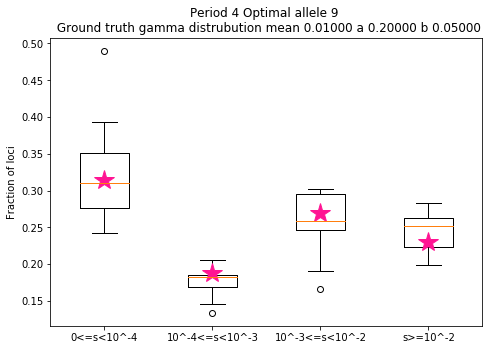

(4, 9, 0.01)
(0.3, 0.033333)


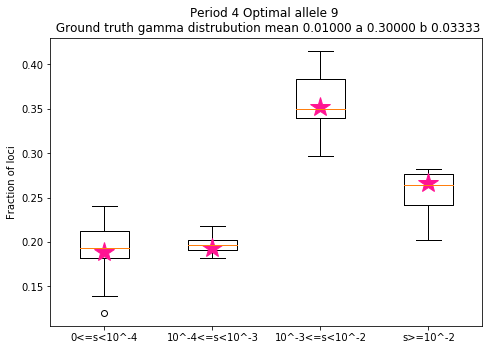

(4, 9, 0.01)
(0.6, 0.016667)


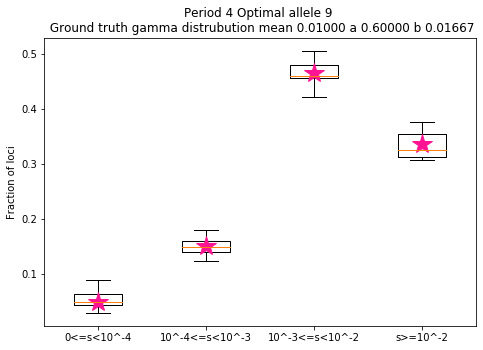

(4, 10, 1e-05)
(0.2, 5e-05)


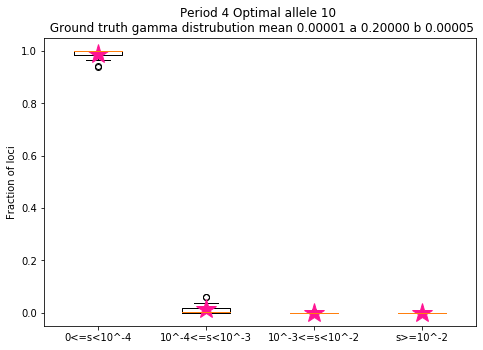

(4, 10, 1e-05)
(0.3, 3.3e-05)


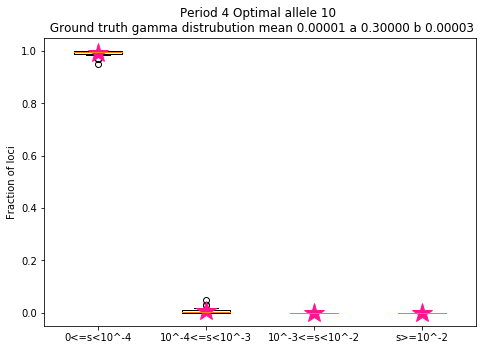

(4, 10, 1e-05)
(0.6, 1.7e-05)


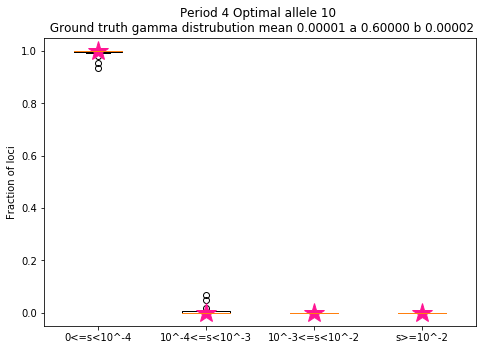

(4, 10, 0.0001)
(0.2, 0.0005)


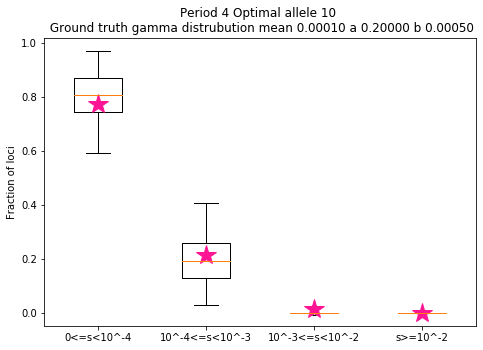

(4, 10, 0.0001)
(0.3, 0.000333)


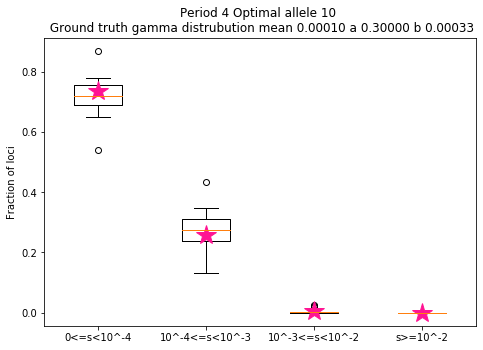

(4, 10, 0.0001)
(0.6, 0.000167)


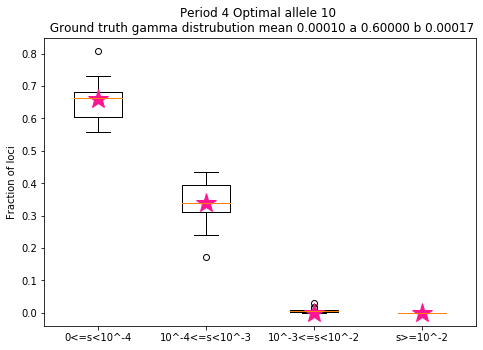

(4, 10, 0.001)
(0.2, 0.005)


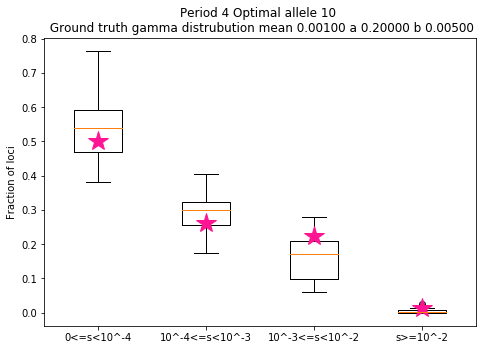

(4, 10, 0.001)
(0.3, 0.003333)


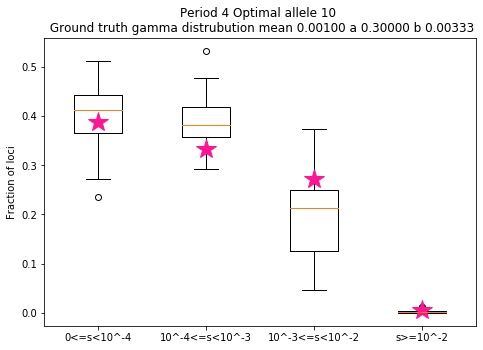

(4, 10, 0.001)
(0.6, 0.001667)


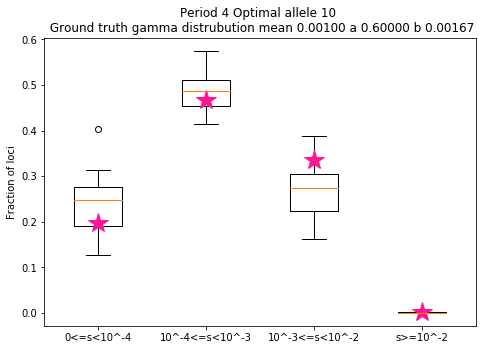

(4, 10, 0.01)
(0.2, 0.05)


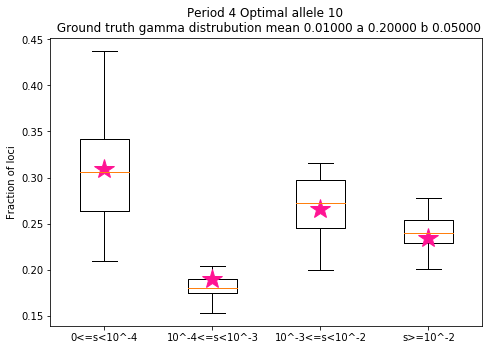

(4, 10, 0.01)
(0.3, 0.033333)


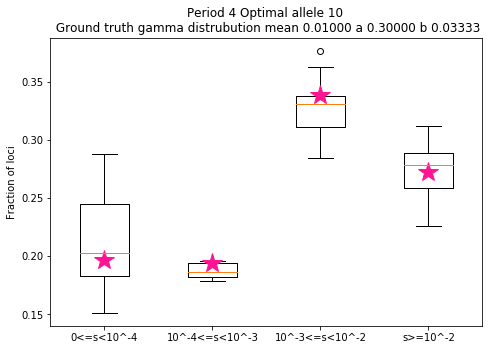

(4, 10, 0.01)
(0.6, 0.016667)


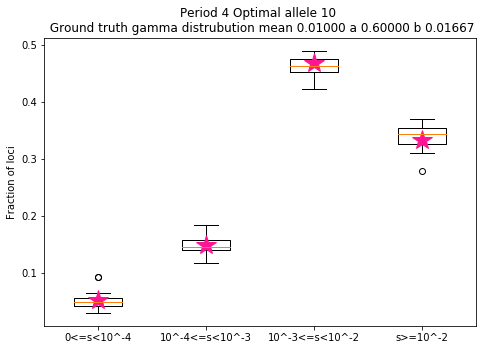

CPU times: user 4min 15s, sys: 1.11 s, total: 4min 16s
Wall time: 4min 18s


In [3]:
%%time
if __name__ == '__main__':
    main()